# PARTIALLY AUTOMATING A BANK'S PERSONAL LOAN DEPARTMENT 

The goal of this project is to build a model that can determine the probability of a customer defaulting on a new personal loan.  This would allow the bank to instantly approve or deny a loan application.

Historical data from the Personal Loan Department at Key West Bank is used to generate the model. In this data, the dependent variable (Outcome) is binary hence a logistic regression model is the first appropriate model to generate. The outcome varaible from the data is either 1 (defaulted) or 0 (did not default). 

A probabilty equal to or closer to 1 means a customer is likely to default. The model would produce an outcome of 1 and the bank may opt to not give out the loan. If the predicted probabilty is closer to 0, the model wil spite out a 0, meanig the customer is unlikely to default

In [2]:
# Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.api as sm

In [3]:
# Loading data
df=pd.read_csv('keywest.csv')
df

,Salary,Late_on_1,Late_on_2,Location,Single,Existing_Loans,Age,Yrs_at_KWB,Outcome
0,51,1,0,0,0,0,30,5,0
1,58,1,0,0,1,1,46,26,0
2,26,1,0,0,1,0,25,12,1
3,45,1,0,0,0,1,57,3,0
4,25,1,0,0,0,1,63,33,0
...,...,...,...,...,...,...,...,...,...
94,48,0,0,1,0,0,34,20,0
95,37,0,0,1,1,0,18,1,0
96,40,0,0,1,0,0,59,2,0
97,58,0,0,1,0,1,40,20,0


In [4]:
# Getting dimensions of dataframe to figure out the size of the dataframe
df.shape 

(99, 9)

There are 98 records and 9 variables 

In [5]:
# Using the  data to figure out the distribution of historic outcomes 
outcome_tally=df.groupby('Outcome').size()
outcome_tally

Outcome
0    44
1    55
dtype: int64

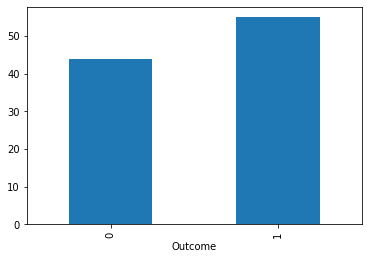

In [6]:
# Plotting outcome distributions
outcome_tally.plot(x='Outcome', Y=0, kind='bar')
outcome_tally.plot.bar()

In [7]:
# Displaying the stats of non-dichotomous variables, to understand how they are distributed. This may also be used 
# later when generating a single test case. 
df[['Salary','Age','Yrs_at_KWB']].describe()

,Salary,Age,Yrs_at_KWB
count,99.000000,99.000000,99.000000
mean,38.494949,34.979798,11.272727
std,10.467027,13.017241,9.609538
min,19.000000,18.000000,1.000000
25%,30.500000,25.000000,3.000000
50%,38.000000,30.000000,9.000000
75%,46.500000,44.500000,15.000000
max,61.000000,64.000000,40.000000


The first step is to process the data. This includes assessing variables to ensure they are relevant to use. Outliers and highly correlated variables are assessed and removed. 

Highly correlated variables can result in multicollinearity, which will undermine the statistical significance of an independent variable.

In [7]:
# Correlation matrix
df.corr()

,Salary,Late_on_1,Late_on_2,Location,Single,Existing_Loans,Age,Yrs_at_KWB,Outcome
Salary,1.000000,-0.107508,-0.060153,-0.010229,-0.245157,0.086864,-0.117580,-0.227587,-0.289326
Late_on_1,-0.107508,1.000000,-0.493710,-0.025031,0.012479,0.004126,-0.007801,-0.005607,-0.091287
Late_on_2,-0.060153,-0.493710,1.000000,0.106471,0.127646,-0.003760,-0.182301,-0.066242,0.429893
Location,-0.010229,-0.025031,0.106471,1.000000,0.051229,0.026024,-0.100757,-0.026818,0.425017
Single,-0.245157,0.012479,0.127646,0.051229,1.000000,0.156925,-0.181155,-0.005813,0.332644
Existing_Loans,0.086864,0.004126,-0.003760,0.026024,0.156925,1.000000,0.123331,0.239069,-0.013558
Age,-0.117580,-0.007801,-0.182301,-0.100757,-0.181155,0.123331,1.000000,0.557033,-0.360824
Yrs_at_KWB,-0.227587,-0.005607,-0.066242,-0.026818,-0.005813,0.239069,0.557033,1.000000,-0.172218
Outcome,-0.289326,-0.091287,0.429893,0.425017,0.332644,-0.013558,-0.360824,-0.172218,1.000000


Variables are not too highly correlated. The Age and Yrs_at_KWB have the highest correlattion of 0.557.
These variables will not be discarded at this stage, as the correlation is not significantly high enough to justify removing them. We will proceed to use all variables to generate model and see how they fare. 

## BUILDING THE MODEL 
The data set is split into a training set for training the model and a test set to validate the accuracy of the model.

In [8]:
# Splitting the data into training and testing datasets
y=df[['Outcome']]
x=df[['Salary','Late_on_1','Late_on_2','Location','Single','Existing_Loans','Age','Yrs_at_KWB']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

In [9]:
# Creating the logistic model using all variables and printing results
logit_model=sm.Logit(y_train,x_train)
results=logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.305295
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                   49
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            7
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                  0.5594
Time:                        18:17:59   Log-Likelihood:                -14.959
converged:                       True   LL-Null:                       -33.954
Covariance Type:            nonrobust   LLR p-value:                 3.045e-06
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Salary            -0.1166      0.045     -2.576      0.010      -0.205      -0.028
Late_on_1        

P-value helps determine the significance of regression results. Coefficients with high p-values (p-value > 0.05) will be excluded from the model.

In our case, we have a null hypothesis that there is no relationship between the dependent and independent variables, and that results obtained are due to chance, and not significant. A small p-value (p-value <= 0.05) indicates strong evidence against the null hypothesis, and thus the threshold for statistically significant variables. 

We can elimate variables that fail to reject the null hypothesis (those that are statistically insignificant) starting  with the variable with the highest P-value (Existing_Loans) 

In [10]:
# Regenerate model without Existing_Loans.
y=df[['Outcome']]
x=df[['Salary','Late_on_1','Late_on_2','Location','Single','Age','Yrs_at_KWB']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

In [11]:
# Model 2
logit_model_2=sm.Logit(y_train,x_train)
results_2=logit_model_2.fit()
print(results_2.summary())

Optimization terminated successfully.
         Current function value: 0.307949
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                   49
Model:                          Logit   Df Residuals:                       42
Method:                           MLE   Df Model:                            6
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                  0.5556
Time:                        18:18:05   Log-Likelihood:                -15.090
converged:                       True   LL-Null:                       -33.954
Covariance Type:            nonrobust   LLR p-value:                 1.269e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Salary        -0.1174      0.044     -2.664      0.008      -0.204      -0.031
Late_on_1      1.4379      1.

While existing loans is at times taken into consideration when banks are assessing giving out personal loans, the variable used to generate the model is binary. This means, only a yes or no response to weather a customer has an exisitng loan is recorded. This variable is statisitically insignificant and as a result, is not fitting for this model to help determine probability of default.

Perhaps providing a variable with actual values of exisiting loans would be more appropriate. In that case, we can test whether the value of an existing loan can be used to determine probability of default.

Next we remove the Age variable, which now has the highest p-value, above 5% (0.05). Continue to remove variables one at a time and regenerate the model

In [12]:
# Removing Age variable
y=df[['Outcome']]
x=df[['Salary','Late_on_1','Late_on_2','Location','Single','Yrs_at_KWB']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

In [13]:
# Model 3
logit_model_3=sm.Logit(y_train,x_train)
results_3=logit_model_3.fit()
print(results_3.summary())

Optimization terminated successfully.
         Current function value: 0.311473
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                   49
Model:                          Logit   Df Residuals:                       43
Method:                           MLE   Df Model:                            5
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                  0.5505
Time:                        18:18:12   Log-Likelihood:                -15.262
converged:                       True   LL-Null:                       -33.954
Covariance Type:            nonrobust   LLR p-value:                 5.017e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Salary        -0.1051      0.037     -2.838      0.005      -0.178      -0.032
Late_on_1      1.5097      1.

Next we remove the Late_on_1 variable

In [14]:
# Removing Late_on_1 variable
y=df[['Outcome']]
x=df[['Salary','Late_on_2','Location','Single','Yrs_at_KWB']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

In [15]:
# Model 4
logit_model_4= sm.Logit(y_train,x_train)
results_4=logit_model_4.fit()
print(results_4.summary())

Optimization terminated successfully.
         Current function value: 0.332171
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                   49
Model:                          Logit   Df Residuals:                       44
Method:                           MLE   Df Model:                            4
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                  0.5206
Time:                        18:18:16   Log-Likelihood:                -16.276
converged:                       True   LL-Null:                       -33.954
Covariance Type:            nonrobust   LLR p-value:                 3.927e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Salary        -0.0809      0.029     -2.798      0.005      -0.138      -0.024
Late_on_2      3.7005      1.

Next, the Yrs_at_KWB is removed

In [16]:
# Removing the Yrs_at_KWB variable
y=df[['Outcome']]
x=df[['Salary','Late_on_2','Location','Single']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

In [18]:
# Model 5
logit_model_5= sm.Logit(y_train,x_train)
results_5=logit_model_5.fit()
print(results_5.summary())

Optimization terminated successfully.
         Current function value: 0.353501
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                   49
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                  0.4899
Time:                        18:18:43   Log-Likelihood:                -17.322
converged:                       True   LL-Null:                       -33.954
Covariance Type:            nonrobust   LLR p-value:                 2.832e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Salary        -0.0881      0.028     -3.167      0.002      -0.143      -0.034
Late_on_2      3.3965      1.

The final model will take Salary, Late_on_2, Location, Single as variables. The model would be able to help a user answer questions such as how the probability of getting a loan (1 vs 0) changes for every additional thousand dollars a person earns, if they are single (or not), if they were late_on_2 (late payment on 2) and location. 

These varaibles are determined by the bank and so bare some meaning to the bank e.g late_on_2.

We can validate this model at this point. 

In [19]:
# Regenerating model using the above mentioned variables so we can predict output
# Model name is also changed to logreg. The output is exactly the same as above (model 5)

logreg = LogisticRegression()
logreg.fit(x_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# Predicting y (outcome) using the x variables on the test data set. The process uses the final logistic regression 
# model we generated. This will allow us to assess the performance of model by comparing what the model predicted the
# outcome would be vs the actual y values (outcome) on the test data set.
# The predicted y values are rounded to either 0, if probability is lower than 50%, and 1 otherwise
y_predict = logreg.predict(x_test)
y_predict

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1])

In [21]:
# Generating confusion matrix to get the performance visualization of the model.

from sklearn.metrics import confusion_matrix
logreg_confusion_matrix = confusion_matrix(y_test,y_predict)
print(logreg_confusion_matrix,)

[[14  5]
 [ 7 24]]


The model was able to correctly classify 38 cases (14+24) and misclassified 12 cases (7+5).

In the y_test set, 14 cases where the outcome was 0 were predicted correctly by the model and 24 cases where the outcome was 1 were predicted correctly by the model. However in 5 cases, the model predicted the outcome as 1 when in fact, in the y-test set, the outcome was 0. Similarly, in 7 cases the model predicted an outcome of 0 when in fact the outcome was classified as a 1 in the test set.

In [22]:
# Generating the accuracy of logistic regression classifier on the test set i.e. accuracy of model when applying it 
# to test set
logreg.score(x_test,y_test)
print('Model accuracy on test set is: {}%'.format((logreg.score(x_test,y_test)*100)))

Model accuracy on test set is:76.0%


In [28]:
# Alternatively, the accuracy can be generated using the values in the confusion matrix, by diving outcomes correctly 
# classified by total size of data set
Model_accuracy=(logreg_confusion_matrix[0,0]+logreg_confusion_matrix[1,1])/len(y_test)
print ("{}%".format(Model_accuracy*100))

76.0%


Currently, a probability of 50% or more is classified as a default. Anything less would be considered unlikely to default. 

However, in banking, a higher degree of accuracy is important. A customer who defaults can cost the bank a lot of money. The cutoff point can therefore be adjusted. For this model, I choose to decrease the cutoff point by 20%. This means if the probabilty of default is 30% or greater, The customer is classified as likely to default. This could improve the model accuracy.

In [34]:
# Creating a predictive model with new cutoff point
y_predict2 = logreg.predict(x_test+0.20)
logreg_confusion_matrix2 = confusion_matrix(y_test,y_predict2)
Model_accuracy2=(logreg_confusion_matrix2[0,0]+logreg_confusion_matrix2[1,1])/len(y_test)
print('Model Accuracy with new cut-off point is {}%:'.format(Model_accuracy2*100))

Model Accuracy with new cut-off point is 84.0%:


### Single case test

Assume there is a customer, Client M with the following profile.
The model can be used to predict if they are likely to default or not, based on the 30% or more cut off point for a 'likely to default'  status

In [3]:
# Creating a data frame containing client M's information 
data = {'Salary':  [10],
        'Late_on_2': [0],
        'Location': [1],
        'Single':[1]
        }

df2 = pd.DataFrame (data, columns = ['Salary','Late_on_2','Location','Single'])
df2

,Salary,Late_on_2,Location,Single
0,10,0,1,1


In [46]:
# Use the predictive model to test what the model would give based on client M's data. we get the output (1 or 0)and a
# corresponding statement for this output 

Test_Case = logreg.predict(df2+0.20)
print('Client M: {} '.format(Test_Case))
if Test_Case[0]==0:
    print('unlikely to default')
else:
    print('likely to default')

Client M: [1] 
likely to default
